In [2]:
import numpy as np
import numpy.linalg as nla
import numpy.random as random
import scipy.linalg as la
import scipy.sparse as sp
from matplotlib import pyplot as plt
from itertools import product
import time
from tqdm import tqdm
from IPython.display import clear_output
from numpy import fft
import math

Coordinates: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5

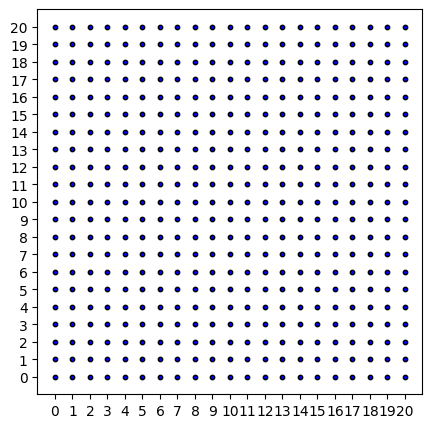

In [3]:
# Generate list of coordinates

# Lattice size
Nx, Ny = 21, 21  # example values

# Generate coordinates
xs = np.arange(Nx)
ys = np.arange(Ny)
X, Y = np.meshgrid(xs, ys, indexing='ij')

# Create array of tuples (site coordinates)
coords = [(int(x), int(y)) for x, y in zip(X.ravel(), Y.ravel())]

# Display them
print("Coordinates:", coords)
print(np.size(coords))

# Scatter plot
plt.figure(figsize=(5,5))
plt.scatter(X, Y, s=10, c='blue', edgecolors='k')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(xs)
plt.yticks(ys)
plt.show()

Points inside radius R: [(2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (1

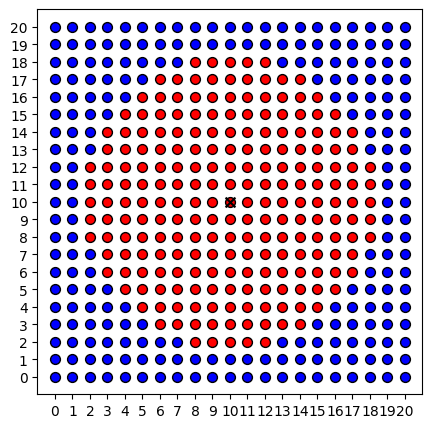

In [4]:
# Determine the set of points within radius R

# Lattice size
Nx, Ny = 21, 21  # example values

# Define radius
R = 0.4 * min(Nx, Ny)

# Reference point in the center
xref, yref = Nx // 2, Ny // 2

# Generate lattice coordinates
xs = np.arange(Nx)
ys = np.arange(Ny)
X, Y = np.meshgrid(xs, ys, indexing='ij')

# Compute squared distances from reference
dist2 = (X - xref)**2 + (Y - yref)**2

# Select points inside radius
inside_mask = dist2 < R**2
coords_inside = [(int(x), int(y)) for x, y, m in zip(X.ravel(), Y.ravel(), inside_mask.ravel()) if m]

print("Points inside radius R:", coords_inside)

# Scatter plot
plt.figure(figsize=(5,5))
plt.scatter(X[~inside_mask], Y[~inside_mask], s=50, c='blue', edgecolors='k', label='Outside R')
plt.scatter(X[inside_mask], Y[inside_mask], s=50, c='red', edgecolors='k', label='Inside R')

# Mark reference point
plt.scatter([xref], [yref], s=50, c='black', marker='x', label='Reference')

plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(xs)
plt.yticks(ys)
#plt.legend()
plt.show()

Nx=21, Ny=21, R=8.400, center=(10,10)
|A|=79, |B|=72, |C|=70, outside=220

A: [(6, 17), (7, 16), (7, 17), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (11, 10), (11, 11), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 18), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (12, 15), (12, 16), (12, 17), (12, 18), (13, 10), (13, 11), (13, 12), (13, 13), (13, 14), (13, 15), (13, 16), (13, 17), (14, 10), (14, 11), (14, 12), (14, 13), (14, 14), (14, 15), (14, 16), (14, 17), (15, 10), (15, 11), (15, 12), (15, 13), (15, 14), (15, 15), (15, 16), (16, 10), (16, 11), (16, 12), (16, 13), (16, 14), (16, 15), (17, 10), (17, 11), (17, 12), (17, 13), (17, 14), (18, 10), (18, 11), (18, 12)]

B: [(2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7

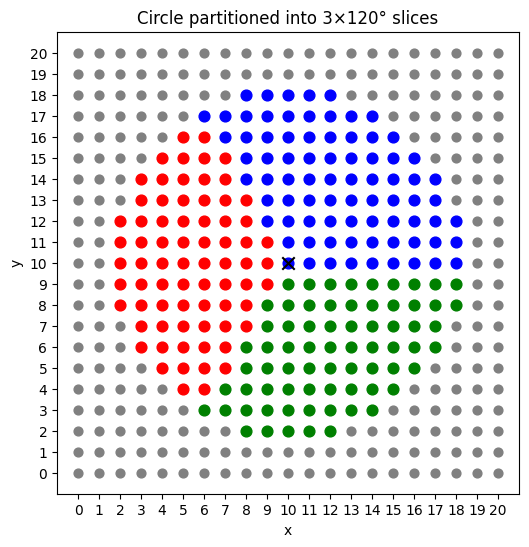

In [5]:
# separate circle into three equal partitions

# --- params ---
Nx, Ny = 21, 21
R = 0.4 * min(Nx, Ny)
xref, yref = Nx // 2, Ny // 2

# --- lattice ---
xs, ys = np.arange(Nx), np.arange(Ny)
X, Y = np.meshgrid(xs, ys, indexing='ij')

# --- circle (plain Euclidean; swap to minimal-image if you want PBC) ---
DX, DY = X - xref, Y - yref
inside = (DX**2 + DY**2) < R**2

# --- 120° sector labels via angle ---
theta = np.mod(np.arctan2(DY, DX), 2*np.pi)
a2 = 2*np.pi/3
a4 = 4*np.pi/3

A_mask = inside & (theta >= 0)    & (theta < a2)
B_mask = inside & (theta >= a2)   & (theta < a4)
C_mask = inside & (theta >= a4)   & (theta < 2*np.pi)
outside_mask = ~inside

# --- coordinate lists ---
coords_A = [(int(x), int(y)) for x, y in zip(X[A_mask], Y[A_mask])]
coords_B = [(int(x), int(y)) for x, y in zip(X[B_mask], Y[B_mask])]
coords_C = [(int(x), int(y)) for x, y in zip(X[C_mask], Y[C_mask])]
coords_outside = [(int(x), int(y)) for x, y in zip(X[outside_mask], Y[outside_mask])]

print(f"Nx={Nx}, Ny={Ny}, R={R:.3f}, center=({xref},{yref})")
print(f"|A|={len(coords_A)}, |B|={len(coords_B)}, |C|={len(coords_C)}, outside={len(coords_outside)}")
print("\nA:", coords_A)
print("\nB:", coords_B)
print("\nC:", coords_C)

# --- plot ---
plt.figure(figsize=(6,6))
plt.scatter(X[outside_mask], Y[outside_mask], s=40, c='grey',  label='Outside')
plt.scatter(X[A_mask],      Y[A_mask],      s=60, c='blue',  label='Slice A [0°,120°)')
plt.scatter(X[B_mask],      Y[B_mask],      s=60, c='red',   label='Slice B [120°,240°)')
plt.scatter(X[C_mask],      Y[C_mask],      s=60, c='green', label='Slice C [240°,360°)')
plt.scatter([xref], [yref], s=80, c='black', marker='x', label='Center')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(xs) 
plt.yticks(ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle partitioned into 3×120° slices')
plt.show()


In [6]:
# ----------------------------------------------------
# Construct single-particle real-space projector
# ----------------------------------------------------

# Parameters
Nx = 21
Ny = 21
alpha = 1

# --- k-grids in FFT's native ordering (radians per site) ---
kx = 2*np.pi * np.fft.fftfreq(Nx, d=1.0)            # (Nx,)
ky = 2*np.pi * np.fft.fftfreq(Ny, d=1.0)            # (Ny,)
KX, KY = np.meshgrid(kx, ky, indexing='ij')         # (Nx, Ny)

# --- Hamiltonian vector n(k) ---
nx = np.sin(KX)
ny = np.sin(KY)
nz = alpha - np.cos(KX) - np.cos(KY)
n_mag = np.sqrt(nx**2 + ny**2 + nz**2)
n_mag = np.where(n_mag == 0, 1e-15, n_mag)          # avoid divide-by-zero


# FFT from n(k) k-space to real space
def k_to_r_rel(nk, k_is_centered=False, norm='backward'):
    """
    nk: (Nx, Ny) array holding n(kx,ky) on the FFT grid.
    k_is_centered: True if nk is fftshifted so k=0 is at the center.
    norm: 'backward' (ifft divides by Nx*Ny), 'ortho', or 'forward'.
    Returns:
        N : (Nx, Ny, Nx, Ny) with N[x,y,xp,yp] = n((x-xp) mod Nx, (y-yp) mod Ny)
        nR: (Nx, Ny) inverse FFT kernel n(Rx,Ry)
    """
    Nx, Ny = nk.shape
    if k_is_centered:
        nk = np.fft.ifftshift(nk)
    nR = np.fft.ifft2(nk, norm=norm)
    nR = np.real_if_close(nR, tol=1e3)

    x = np.arange(Nx)
    y = np.arange(Ny)
    X  = x[:, None, None, None]      # (Nx,1,1,1)
    Xp = x[None, None, :, None]      # (1,1,Nx,1)
    Y  = y[None, :, None, None]      # (1,Ny,1,1)
    Yp = y[None, None, None, :]      # (1,1,1,Ny)

    dX = (X - Xp) % Nx               # (Nx,1,Nx,1)
    dY = (Y - Yp) % Ny               # (1,Ny,1,Ny)

    N = nR[dX, dY]                   # broadcasts to (Nx,Ny,Nx,Ny)
    return N


# real space n(r,r')
nx_real = k_to_r_rel(nx/n_mag)
ny_real = k_to_r_rel(ny/n_mag)
nz_real = k_to_r_rel(nz/n_mag)

# Paulis
pauli_x = np.array([[0,1],[1,0]], dtype=complex)
pauli_y = 1j*np.array([[0,-1],[1,0]], dtype=complex)
pauli_z = np.array([[1,0],[0,-1]], dtype=complex)

# real space h(r,r')_{\sigma\eta}
h_real = np.moveaxis(nx_real[..., None, None] * pauli_x + ny_real[..., None, None] * pauli_y + nz_real[..., None, None] * pauli_z, 4, 2)

# Single-particle projector to lower-band
dims = (Nx, Ny, 2)
I = np.eye(np.prod(dims)).reshape(*dims, *dims)
Pminus = (1/2)*(I - h_real)

# Real-Space Chern Number Formula
def chern_from_projector(Pminus, A_mask, B_mask, C_mask):
    """
    Compute the real-space Chern number using three 120° sectors A,B,C.

    Parameters
    ----------
    Pminus : ndarray, shape (Nx, Ny, 2, Nx, Ny, 2)
        Projector onto the occupied subspace in the basis |x,y,s>.
        First three axes are 'left' (bra) indices (x,y,s), last three are 'right' (ket) (x',y',s').
    A_mask, B_mask, C_mask : ndarray, shape (Nx, Ny), dtype=bool
        Spatial sector masks. They are treated as identity on the 2-dim orbital subspace
        (i.e., both orbitals included for any selected site).

    Returns
    -------
    Chern : complex
        12π i [ Tr(P_CA P_AB P_BC) - Tr(P_AC P_CB P_BA) ].
    """
    if Pminus.ndim != 6:
        raise ValueError("Pminus must have 6 dims (Nx,Ny,2,Nx,Ny,2).")
    Nx, Ny = A_mask.shape
    if Pminus.shape != (Nx, Ny, 2, Nx, Ny, 2):
        raise ValueError(f"Pminus shape {Pminus.shape} does not match (Nx,Ny,2,Nx,Ny,2) with Nx,Ny={Nx,Ny}.")

    # Flatten (x,y,s) ↔ single index; treat masks as identity on orbital (include both s)
    Ntot = Nx * Ny * 2
    P = np.asarray(Pminus, dtype=complex, order='C').reshape(Ntot, Ntot)

    def sector_indices(mask_xy):
        # site index j = x*Ny + y (row-major). Expand to orbital: J = 2*j + s, s=0,1.
        sites = np.flatnonzero(mask_xy.ravel(order='C'))
        return np.concatenate((2*sites, 2*sites + 1))

    iA = sector_indices(A_mask)
    iB = sector_indices(B_mask)
    iC = sector_indices(C_mask)

    # Sector blocks
    P_CA = P[np.ix_(iC, iA)]
    P_AB = P[np.ix_(iA, iB)]
    P_BC = P[np.ix_(iB, iC)]

    P_AC = P[np.ix_(iA, iC)]
    P_CB = P[np.ix_(iC, iB)]
    P_BA = P[np.ix_(iB, iA)]

    # Traces of cyclic products (einsum or @+trace both fine)
    t1 = np.trace(P_CA @ P_AB @ P_BC)
    t2 = np.trace(P_AC @ P_CB @ P_BA)

    Y = 12 * np.pi * 1j * (t1 - t2)
    return Y

Chern = chern_from_projector(Pminus, A_mask, B_mask, C_mask)
print(Chern)

(0.9999229559063373+0j)


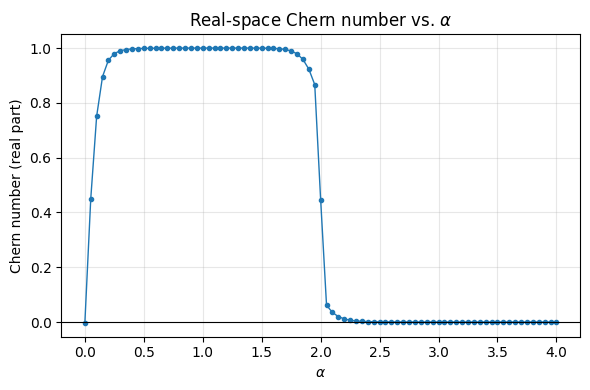

In [7]:
# -------------------------
# Sector masks (scanline)
# -------------------------
def sector_masks(Nx, Ny, R=None, xref=None, yref=None):
    if R is None:
        R = 0.4 * min(Nx, Ny)
    if xref is None: xref = Nx // 2
    if yref is None: yref = Ny // 2

    inside = np.zeros((Nx, Ny), dtype=bool)
    A = np.zeros_like(inside)
    B = np.zeros_like(inside)
    C = np.zeros_like(inside)
    rr = R * R
    ymax = int(math.floor(R))
    a2 = 2*np.pi/3
    a4 = 4*np.pi/3

    for dy in range(-ymax, ymax + 1):
        y = yref + dy
        if y < 0 or y >= Ny: 
            continue
        max_dx = int(math.floor(math.sqrt(rr - dy*dy)))
        x0 = max(0, xref - max_dx)
        x1 = min(Nx - 1, xref + max_dx)
        if x0 > x1:
            continue

        inside[x0:x1+1, y] = True
        dxs = np.arange(x0, x1+1) - xref
        dys = np.full_like(dxs, dy)
        theta = np.mod(np.arctan2(dys, dxs), 2*np.pi)

        A[x0:x1+1, y] = (theta >= 0)   & (theta < a2)
        B[x0:x1+1, y] = (theta >= a2)  & (theta < a4)
        C[x0:x1+1, y] = (theta >= a4)  & (theta < 2*np.pi)

    return A, B, C, inside

# -------------------------
# k->(r-r') helper
# -------------------------
def k_to_r_rel(nk, k_is_centered=False, norm='backward'):
    Nx, Ny = nk.shape
    if k_is_centered:
        nk = np.fft.ifftshift(nk)
    nR = np.fft.ifft2(nk, norm=norm)
    nR = np.real_if_close(nR, tol=1e3)
    x = np.arange(Nx); y = np.arange(Ny)
    X  = x[:, None, None, None]
    Xp = x[None, None, :, None]
    Y  = y[None, :, None, None]
    Yp = y[None, None, None, :]
    dX = (X - Xp) % Nx
    dY = (Y - Yp) % Ny
    return nR[dX, dY]  # (Nx,Ny,Nx,Ny)

# -------------------------
# Chern from projector
# -------------------------
def chern_from_projector(Pminus, A_mask, B_mask, C_mask):
    # Pminus shape must be (Nx,Ny,2,Nx,Ny,2)
    Nx, Ny = A_mask.shape
    if Pminus.shape != (Nx, Ny, 2, Nx, Ny, 2):
        raise ValueError(f"Bad Pminus shape {Pminus.shape} (expected {(Nx,Ny,2,Nx,Ny,2)})")

    Ntot = Nx*Ny*2
    P = np.asarray(Pminus, dtype=complex, order='C').reshape(Ntot, Ntot)

    def sector_indices(mask_xy):
        sites = np.flatnonzero(mask_xy.ravel(order='C'))
        return np.concatenate((2*sites, 2*sites + 1))

    iA = sector_indices(A_mask)
    iB = sector_indices(B_mask)
    iC = sector_indices(C_mask)

    P_CA = P[np.ix_(iC, iA)]
    P_AB = P[np.ix_(iA, iB)]
    P_BC = P[np.ix_(iB, iC)]
    P_AC = P[np.ix_(iA, iC)]
    P_CB = P[np.ix_(iC, iB)]
    P_BA = P[np.ix_(iB, iA)]

    t1 = np.trace(P_CA @ P_AB @ P_BC)
    t2 = np.trace(P_AC @ P_CB @ P_BA)
    return 12*np.pi*1j*(t1 - t2)

# -------------------------
# Main sweep over alpha
# -------------------------
Nx, Ny = 21, 21
A_mask, B_mask, C_mask, _ = sector_masks(Nx, Ny)  # 120° sectors in a circle of radius 0.4*min

# Pauli matrices
sigx = np.array([[0,1],[1,0]], dtype=complex)
sigy = np.array([[0,-1j],[1j,0]], dtype=complex)
sigz = np.array([[1,0],[0,-1]], dtype=complex)

alphas = np.linspace(0.0, 4.0, 81)  # 81 points
chern_vals = []

# Precompute k-grids (independent of alpha)
kx = 2*np.pi * np.fft.fftfreq(Nx, d=1.0)
ky = 2*np.pi * np.fft.fftfreq(Ny, d=1.0)
KX, KY = np.meshgrid(kx, ky, indexing='ij')

for alpha in alphas:
    # n(k)
    nxk = np.sin(KX)
    nyk = np.sin(KY)
    nzk = alpha - np.cos(KX) - np.cos(KY)
    nmag = np.sqrt(nxk**2 + nyk**2 + nzk**2)
    nmag = np.where(nmag == 0, 1e-15, nmag)

    # real-space kernels n(r-r')
    nx_real = k_to_r_rel(nxk / nmag)  # (Nx,Ny,Nx,Ny)
    ny_real = k_to_r_rel(nyk / nmag)
    nz_real = k_to_r_rel(nzk / nmag)

    # build h_real_{(x,y),(x',y')} as 2x2 matrices
    # shape: (Nx,Ny,Nx,Ny,2,2) then move to (Nx,Ny,2,Nx,Ny,2)
    h_rr = (nx_real[..., None, None] * sigx +
            ny_real[..., None, None] * sigy +
            nz_real[..., None, None] * sigz)
    h_rr = np.moveaxis(h_rr, 4, 2)  # (Nx,Ny,2,Nx,Ny,2)

    # projector onto lower band: (I - h)/2
    dims = (Nx, Ny, 2)
    I = np.eye(np.prod(dims)).reshape(*dims, *dims)
    Pminus = 0.5*(I - h_rr)

    Y = chern_from_projector(Pminus, A_mask, B_mask, C_mask)
    # Chern should be real; keep real part (drop tiny imaginary drift)
    chern_vals.append(np.real_if_close(Y).real)

chern_vals = np.array(chern_vals)

# -------------------------
# Plot
# -------------------------
plt.figure(figsize=(6,4))
plt.plot(alphas, chern_vals, marker='o', ms=3, lw=1)
plt.axhline(0, color='k', lw=0.8)
plt.xlabel(r'$\alpha$')
plt.ylabel('Chern number (real part)')
plt.title('Real-space Chern number vs. $\\alpha$')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

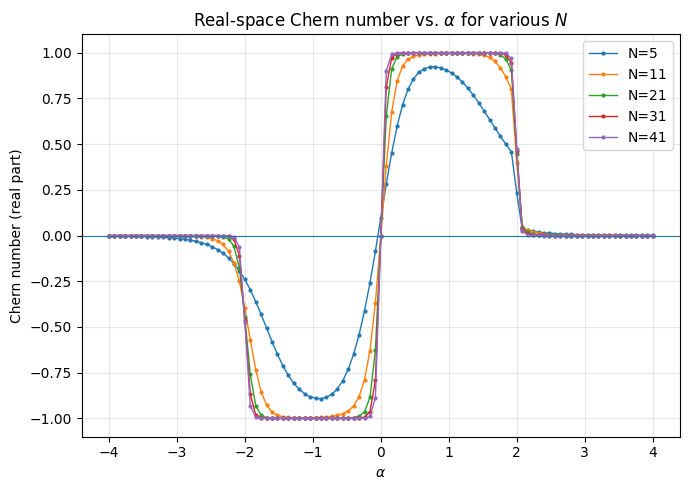

In [10]:
# -------------------------
# Sector masks (scanline raster)
# -------------------------
def sector_masks(Nx, Ny, R=None, xref=None, yref=None):
    if R is None:
        R = 0.4 * min(Nx, Ny)
    if xref is None: xref = Nx // 2
    if yref is None: yref = Ny // 2

    inside = np.zeros((Nx, Ny), dtype=bool)
    A = np.zeros_like(inside)
    B = np.zeros_like(inside)
    C = np.zeros_like(inside)
    rr = R * R
    ymax = int(math.floor(R))
    a2 = 2*np.pi/3
    a4 = 4*np.pi/3

    for dy in range(-ymax, ymax + 1):
        y = yref + dy
        if y < 0 or y >= Ny:
            continue
        max_dx = int(math.floor(math.sqrt(rr - dy*dy)))
        x0 = max(0, xref - max_dx)
        x1 = min(Nx - 1, xref + max_dx)
        if x0 > x1:
            continue

        inside[x0:x1+1, y] = True
        dxs = np.arange(x0, x1+1) - xref
        dys = np.full_like(dxs, dy)
        theta = np.mod(np.arctan2(dys, dxs), 2*np.pi)

        A[x0:x1+1, y] = (theta >= 0)   & (theta < a2)
        B[x0:x1+1, y] = (theta >= a2)  & (theta < a4)
        C[x0:x1+1, y] = (theta >= a4)  & (theta < 2*np.pi)

    return A, B, C, inside

# -------------------------
# k -> (r-r') helper
# -------------------------
def k_to_r_rel(nk, k_is_centered=False, norm='backward'):
    Nx, Ny = nk.shape
    if k_is_centered:
        nk = np.fft.ifftshift(nk)
    nR = np.fft.ifft2(nk, norm=norm)
    nR = np.real_if_close(nR, tol=1e3)

    x = np.arange(Nx); y = np.arange(Ny)
    X  = x[:, None, None, None]
    Xp = x[None, None, :, None]
    Y  = y[None, :, None, None]
    Yp = y[None, None, None, :]
    dX = (X - Xp) % Nx
    dY = (Y - Yp) % Ny
    return nR[dX, dY]  # (Nx,Ny,Nx,Ny)

# -------------------------
# Real-Space Chern Number (Pminus shape fixed as (Nx,Ny,2,Nx,Ny,2))
# -------------------------
def chern_from_operator(self, G, A_mask=None, B_mask=None, C_mask=None):
    """
    Compute the real-space Chern number using the projector built from G.

    This implements the same formula as `chern_from_projector`, but takes the
    input as a general operator G and forms P = G.conj() before the block traces.

    Parameters
    ----------
    G : ndarray, shape (Nx, Ny, 2, Nx, Ny, 2)
        Real-space operator. The projector used here is P = G.conj().
    A_mask, B_mask, C_mask : (Nx,Ny) boolean masks, optional
        If None, use the instance's stored tri-partition masks.

    Returns
    -------
    complex
        12π i [ Tr(P_CA P_AB P_BC) - Tr(P_AC P_CB P_BA) ].
    """
    Nx, Ny = int(self.Nx), int(self.Ny)
    expected = (Nx, Ny, 2, Nx, Ny, 2)
    if G.shape != expected:
        raise ValueError(f"G must have shape {expected}, got {G.shape}")

    # Default masks from the instance unless provided
    A_mask = self.A_mask if A_mask is None else A_mask
    B_mask = self.B_mask if B_mask is None else B_mask
    C_mask = self.C_mask if C_mask is None else C_mask

    # Build projector from G: P = G.conj()
    Ntot = Nx * Ny * 2
    P = np.asarray(G, dtype=complex, order='C').conj().reshape(Ntot, Ntot)

    # Sector indices include both orbitals for each selected site
    iA = self._sector_indices_from_mask(A_mask)
    iB = self._sector_indices_from_mask(B_mask)
    iC = self._sector_indices_from_mask(C_mask)

    P_CA = P[np.ix_(iC, iA)]
    P_AB = P[np.ix_(iA, iB)]
    P_BC = P[np.ix_(iB, iC)]

    P_AC = P[np.ix_(iA, iC)]
    P_CB = P[np.ix_(iC, iB)]
    P_BA = P[np.ix_(iB, iA)]

    t1 = np.trace(P_CA @ P_AB @ P_BC)
    t2 = np.trace(P_AC @ P_CB @ P_BA)
    return 12 * np.pi * 1j * (t1 - t2)

# -------------------------
# Sweep alphas and sizes
# -------------------------
def chern_vs_alpha_for_sizes(N_list=(5,11,21,31,41), n_alpha=501):
    alphas = np.linspace(-4.0, 4.0, n_alpha)
    results = {}

    for N in N_list:
        Nx = Ny = N
        # Sector masks once per N
        A_mask, B_mask, C_mask, _ = sector_masks(Nx, Ny)

        # Pauli (orbital) matrices
        sigx = np.array([[0,1],[1,0]], dtype=complex)
        sigy = np.array([[0,-1j],[1j,0]], dtype=complex)
        sigz = np.array([[1,0],[0,-1]], dtype=complex)

        # k-grid (independent of alpha)
        kx = 2*np.pi * np.fft.fftfreq(Nx, d=1.0)
        ky = 2*np.pi * np.fft.fftfreq(Ny, d=1.0)
        KX, KY = np.meshgrid(kx, ky, indexing='ij')

        chvals = []

        for alpha in alphas:
            # n(k)
            nxk = np.sin(KX)
            nyk = np.sin(KY)
            nzk = alpha - np.cos(KX) - np.cos(KY)
            nmag = np.sqrt(nxk**2 + nyk**2 + nzk**2)
            nmag = np.where(nmag == 0, 1e-15, nmag)

            # real-space kernels n(r-r')
            nx_real = k_to_r_rel(nxk / nmag)
            ny_real = k_to_r_rel(nyk / nmag)
            nz_real = k_to_r_rel(nzk / nmag)

            # h(r,r')_{s,s'}
            h_rr = (nx_real[..., None, None] * sigx +
                    ny_real[..., None, None] * sigy +
                    nz_real[..., None, None] * sigz)
            h_rr = np.moveaxis(h_rr, 4, 2)  # (Nx,Ny,2,Nx,Ny,2)

            # Projector onto lower band
            dims = (Nx, Ny, 2)
            I = np.eye(np.prod(dims)).reshape(*dims, *dims)
            Pminus = 0.5*(I - h_rr)

            Y = chern_from_projector(Pminus, A_mask, B_mask, C_mask)
            chvals.append(np.real_if_close(Y).real)

        results[N] = (alphas, np.array(chvals))
    return results

# Run and plot
results = chern_vs_alpha_for_sizes(N_list=(5,11,21,31,41), n_alpha=101)

plt.figure(figsize=(7,5))
for N, (alphas, chvals) in results.items():
    plt.plot(alphas, chvals, marker='o', ms=2, lw=1, label=f'N={N}')
plt.axhline(0, linewidth=0.8)
plt.xlabel(r'$\alpha$')
plt.ylabel('Chern number (real part)')
plt.title('Real-space Chern number vs. $\\alpha$ for various $N$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()